# Object Oriented Programming

In this practical, we will implement our own models following the conventions from scikit-learn and test them on a real dataset. 

Since we want to write production code, we will work a bit differently than usual, leveraging the pros of a good IDE and a Jupyter Notebooks.


**[Start opiniated comment]**


Notebooks are great for prototyping models and work interactively with your data. They aren't great for code that you want to maintain and use in production (you cannot import from a notebook, they're hard to version control, hard to test, etc.. which are fundamental things in software engineering). Hence, when you're "happy" with a model you have prototyped in a notebook, it is important to implement it as proper Python code in a `.py` file before distributing it.

**[End opiniated comment]**
    
There is a great functionality on notebooks that allows us to develop production code in a `.py` file and test it in the notebook, it's called `autoreload`: you can import functions and classes from your `.py` file, and use them in the notebook. If you modify the file, it will automatically reload it in the notebook.

That's what we will do here, we will develop our own library, called `not_sklearn` that will contain two models, a simple one (called `SimpleModel` and another one for logistic regression. We will import the models in this notebook and test them whilst we develop them.


*Note: If you don't feel comfortable working in both an IDE and notebook, try it. This is important, Data Scientists are more and more expected to write production ready code, whilst some companies still accept a notebook as deliverable, your software engineer colleagues will be gratefull if you can deliver nicely packaged code instead. If you find it really hard, you can copy paste the class from the `.py` file into this notebook and work on it here.*

In [1]:
# That is setting up the autoreload mode to automatically 
# reload your imports when you edit a file
%load_ext autoreload
%autoreload 2

import numpy as np

Here we only need a toy dataset to test our implementation, we'll use the sklearn `load_breast_cancer` function to directly load the Breast Cancer dataset as numpy arrays. By setting `return_X_y` to `True` we get both `X` and `y` which will be the inputs for out `fit` methods

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

We also need some data to predict on, so we'll use `train_test_split` to split our data into training and test sets.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Implement a model that predicts the most common class everytime

First we will implement a really simple model that learns what the most common class from the training set, saves it as an internal state and predicts everything as this class.

For instance, if we have the following training data:
```
X = [[...]] # X doesn't matter here, we will only learn from the target
y = ["cat", "dog", "cat"]
```

We'll learn to predict `cat` everytime. 

When we call predict with say 5 observations we will return 5 predictions, each one being `cat`.

For our model to be compatible with the `sklearn` ecosystem, we will make sure to follow the same conventions, and call our method that train the algorithm `fit` (which takes X and y as inputs) and the method that generates predictions given an X will be `predict`

In [49]:
# To load the solution comment the first line and uncomment the second
from not_sklearn import SimpleModel
# from not_sklearn_solutions import SimpleModel

Implement the `__init__` method in your `SimpleModel` class and create a new instance below:

In [50]:
simplemodel_new = SimpleModel()

Check the attribute `most_common` (you'll need to print it to verify that it's properly set to `None`)

In [51]:
print(simplemodel_new.most_common)

None


Now implement the `fit` method in the file, fit takes two arguments: `X` and `y` and will train your model. 
For our `SimpleModel`, training means finding the most common class in `y` and saving it as our `most_common` attribute.

Call `fit` from your model passing `X_train` and `y_train` as arguments:

In [52]:
simplemodel_new.fit(X_train, y_train)

Check the attribute `most_common` again, if you implemented `fit` properly, it should correspond to the majority class in the `y` that was provided (here `y_train`)

In [53]:
print(simplemodel_new.most_common)

1


Perfect, we're almost done. Only the `predict` method to implement. Here we take an `X` as data to predict, and for each observation in `X` we want to predict the same value, our most commong class `most_common`. Implement it in the file and test it with `x_test` below and save the result as `y_pred`

In [54]:
simplemodel_new.predict(X_test)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

Make sure that `y_pred` has the same dimension as `y_test`

In [58]:
print(simplemodel_new.predict(X_test).shape)
print(y_test.shape)

(171,)
(171,)


Great, now load the accuracy score function from `sklearn.metrics` and check the accuracy of your model on the training set:

In [60]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,simplemodel_new.predict(X_test)))

0.6491228070175439


Well done on implementing your first own model! Now let's make it more challenging and implement a proper algorithm, logistic regression!

## Implement the logistic regression algorithm

For this part it is recommended to open the logistic regression notebook, we will follow the same process but implement our own `LogisticRegression` class.

In [62]:
# To load the solution comment the first line and uncomment the second
from not_sklearn import LogisticRegression
# from not_sklearn_solutions import LogisticRegression

First we need to implement the `__init__` method that will initialise our `LogisticRegression`. Remember that we will need a set of weights `w`, since we do not know yet the dimension of the data we will train our model on, we can only initialise `w` to `None`. We also need to add two parameters that control our algorithm, the step size `gamma` and number of iterations `nr_steps`.

Once you have implemented your `__init__`, instanciate your model with the default parameters and check that the attributes were properly initialised.

In [66]:
lr = LogisticRegression()

print(lr.w)
print(lr.gamma)
print(lr.nr_steps)

None
0.001
1000


Before being able to implement our `fit` and `predict` methods, we will need a few helper methods:
- `sigmoid`: that computes the sigmoid of any vector
- `predicted_values`: similar to the one we did in the logistic regression notebook, it will allow us to compute predictions for a given `X` and `w`.
- `gradient`: that computes the gradient of our loss function given `X`, `y` and `w`. This is the same as we did in the logistic regression notebooks.

Implement the `sigmoid` method that takes an `X` and compute its sigmoid (it's the same as we did previously, just that now its a method on the class, so its first argument will be `self`, and second `X`).

Try to call your sigmoid method on some numpy vector of your choice.

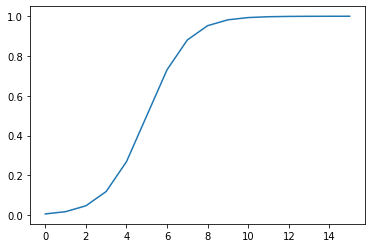

In [73]:
s = np.array([-5,-4,-3,-2,-1, 0, 1, 2, 3,4,5,6,7,8,9,10])
lr.sigmoid(s)

import matplotlib.pyplot as plt

plt.plot(lr.sigmoid(s))
plt.show()

Now implement the `predicted_values` method which takes as input:
* the data `X` - an NxD dimensional matrix of the data (N datapoints)
* a vector `w` - a D dimensional vector of the parameters

and returns:
* `p` - an N dimensional output of predicted probabilities

(you can use your `sigmoid` method)

You can test your method using `X_train` as X matrix and the following vector for weights:

In [74]:
w = np.zeros(X_train.shape[1])

In [75]:
# Add your code here
lr.predicted_values(X_train, w)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

Finally, implement the `gradient` method that computes the gradient of the cross entropy loss, it takes:
* `X` - an NxD dimensional matrix of the data (N datapoints)
* `y` - a N dimensional vector containing the true labels
* `w` - a D dimensional vector of the parameters

and returns:
* a vector, the gradient of the cross entropy loss.

It's the same as for the logistic regression notebook, just make sure you're reusing the predicted_values method we've defined on the class.

You can test your function in the notebook by calling it with `X_train`, `y_train` and the same set of weights as before:

In [79]:
lr.gradient(X_train, y_train, w)

array([-4.13569095e-01, -1.38472362e+00, -2.05591709e+00,  4.34062814e+01,
       -8.94052764e-03,  2.99668342e-03,  1.66636796e-02,  8.79248492e-03,
       -1.67961055e-02, -7.46319095e-03,  2.66350503e-02, -1.52935427e-01,
        1.97420854e-01,  6.99223995e+00, -9.49459799e-04, -5.08018844e-04,
       -5.14321608e-05, -2.05787688e-04, -2.45075628e-03, -3.49847990e-04,
       -1.01786432e-01, -1.64910804e+00,  1.38781407e-01,  9.63018844e+01,
       -1.09057663e-02,  1.59209171e-02,  3.51165503e-02,  1.17597085e-02,
       -2.11996231e-02, -6.94501256e-03])

Great, now we're fully equiped to write the `fit` function.
Implement the fit function that takes a matrix X and a vector y as parameters.
It should initialise self.w to a vector of zeros with the right dimension, 

Then make self.nr_steps iterations of gradient descent to update self.w

It is similar to what the simpleGD function from the previous notebook does,
but here we do not need to keep the history, only setting w.

Try your `fit` function on `X_train` and `y_train`, and check how the attribute `w` has changed:

In [81]:
lr.fit(X_train, y_train)

/Users/paulinafigol/Documents/CS/ads03/ads03/04-object_oriented_programming/not_sklearn.py:48: RuntimeWarning: overflow encountered in exp
  output = 1 / (1 + np.exp(-y))


array([ 2.87391528e-01,  3.87263814e-01,  1.65172538e+00,  5.49407796e-01,
        2.59014914e-03, -1.55970744e-03, -5.78959353e-03, -2.36227873e-03,
        4.97789288e-03,  2.08338015e-03,  2.73723195e-03,  2.70985251e-02,
       -5.38180449e-03, -6.18233248e-01,  1.17680835e-04, -4.52140106e-04,
       -7.84437856e-04, -1.06717015e-04,  3.94062213e-04,  1.35539922e-05,
        3.05050328e-01,  4.82196044e-01,  1.62742164e+00, -8.20980952e-01,
        3.10879192e-03, -6.42900476e-03, -1.19993589e-02, -2.91939564e-03,
        6.43472834e-03,  1.83672779e-03])

In [83]:
lr.w

array([ 2.87391528e-01,  3.87263814e-01,  1.65172538e+00,  5.49407796e-01,
        2.59014914e-03, -1.55970744e-03, -5.78959353e-03, -2.36227873e-03,
        4.97789288e-03,  2.08338015e-03,  2.73723195e-03,  2.70985251e-02,
       -5.38180449e-03, -6.18233248e-01,  1.17680835e-04, -4.52140106e-04,
       -7.84437856e-04, -1.06717015e-04,  3.94062213e-04,  1.35539922e-05,
        3.05050328e-01,  4.82196044e-01,  1.62742164e+00, -8.20980952e-01,
        3.10879192e-03, -6.42900476e-03, -1.19993589e-02, -2.91939564e-03,
        6.43472834e-03,  1.83672779e-03])

Great, now we can implement our last method, `predict`.
It takes a matrix X as input and returns `y_pred` a vector of 0s and 1s. 
It needs to use self.predicted value with X and the current set of weights, self.w. Check if the probability is higher than a given threshold (use 0.5) and return the right classes accordingly.

Test your predict method on `X_train` and save the result in a variable `y_pred`

In [85]:
y_pred = lr.predict(X_train)

Calculate the accuracy of your model

In [86]:
print(metrics.accuracy_score(y_test,lr.predict(X_test)))

0.9239766081871345
